#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

In [19]:
import pandas as pd
df = pd.read_csv("imdb_top_10000.txt", delimiter = "\t")
df.head()

tt0111161 The Shawshank Redemption (1994)  1994   9.2  619479  142 mins.  \
0  tt0110912             Pulp Fiction (1994)  1994   9.0  490065  154 mins.   
1  tt0137523               Fight Club (1999)  1999   8.8  458173  139 mins.   
2  tt0133093               The Matrix (1999)  1999   8.7  448114  136 mins.   
3  tt1375666                Inception (2010)  2010   8.9  385149  148 mins.   
4  tt0109830             Forrest Gump (1994)  1994   8.7  368994  142 mins.   

                        Crime|Drama  
0                    Crime|Thriller  
1            Drama|Mystery|Thriller  
2           Action|Adventure|Sci-Fi  
3  Action|Adventure|Sci-Fi|Thriller  
4              Comedy|Drama|Romance

In [20]:
df = pd.read_csv("imdb_top_10000.txt",names=['imdbID','title','year','score','votes','runtime','genres'], delimiter = "\t")
df.head()

imdbID                            title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

**Cleaning: Examing the dataframe**

In [21]:
df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     1
dtype: int64

In [22]:
df.dropna(subset=['genres'],inplace=True)
df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     0
dtype: int64

**Removing mins from runtime and converting into int**

In [23]:
#df.head()
#url = df.runtime[0]
#url

In [24]:
#runtime = url.split(" mins.")[0]
#runtime

In [25]:
#def get_runtime(url):  
    #runtime = url.split(" mins.")[0]
    #return runtime
    
#df['runtime'] = df.runtime.map(get_runtime)
#df.head()

In [26]:
#df.runtime = df.runtime.astype('int')
#df.dtypes

## 2. Asking Questions

In [49]:
df['score'].max() # 10 is highest, maximun of rating is 9.2 in this db

9.2

In [50]:
df['score'].min() # 0 is lowest, minimun of rating is 1.5 in this db

1.5

In [51]:
IMDb_Top_10=df[['score','votes','title','year']]

IMDb_sort= IMDb_Top_10.sort_values(by=['score'],ascending=False)
IMDb_Top_10.head(10)

score   votes                                           title  year
0    9.2  619479                        The Shawshank Redemption  1994
1    9.0  490065                                    Pulp Fiction  1994
2    8.8  458173                                      Fight Club  1999
3    8.7  448114                                      The Matrix  1999
4    8.9  385149                                       Inception  2010
5    8.7  368994                                    Forrest Gump  1994
6    8.6  338332                                 American Beauty  1999
7    8.1  336855                                          Avatar  2009
8    8.9  325888                                Schindler's List  1993
9    8.8  320105  Star Wars: Episode V - The Empire Strikes Back  1980

## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

**The runtime column describes a number, but is stored as a string**

In [27]:
df.head()
url = df.runtime[0]
url

'142 mins.'

In [28]:
runtime = url.split(" mins.")[0]
runtime

'142'

In [29]:
def get_runtime(url):  
    runtime = url.split(" mins.")[0]
    return runtime
    
df['runtime'] = df.runtime.map(get_runtime)
df.head()

imdbID                            title  year  score   votes runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479     142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065     154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173     139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114     136   
4  tt1375666                 Inception (2010)  2010    8.9  385149     148   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [30]:
df.runtime = df.runtime.astype('int')
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime      int64
genres      object
dtype: object

**The movie year is repeated in the title and year column**

In [31]:
df.head()
url = df.title[0]
url

'The Shawshank Redemption (1994)'

In [32]:
title = url.split(" (")[0]
title

'The Shawshank Redemption'

In [33]:
def get_title(url):  
    title = url.split(" (")[0]
    return title
    
df['title'] = df.title.map(get_title)
df.head()

imdbID                     title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction  1994    9.0  490065      154   
2  tt0137523                Fight Club  1999    8.8  458173      139   
3  tt0133093                The Matrix  1999    8.7  448114      136   
4  tt1375666                 Inception  2010    8.9  385149      148   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

**The genres column is not atomic**

In [34]:
genre_set = set()
for genre in df.genres:
    list_genre = genre.split("|")
    genre_set.update(list_genre)
    
len(genre_set)


24

In [35]:
for genre in genre_set:
    df[genre] = [genre in row.split("|") for row in df.genres]
df.head()

imdbID                     title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction  1994    9.0  490065      154   
2  tt0137523                Fight Club  1999    8.8  458173      139   
3  tt0133093                The Matrix  1999    8.7  448114      136   
4  tt1375666                 Inception  2010    8.9  385149      148   

                             genres    War  Action  Mystery  ...  Music  \
0                       Crime|Drama  False   False    False  ...  False   
1                    Crime|Thriller  False   False    False  ...  False   
2            Drama|Mystery|Thriller  False   False     True  ...  False   
3           Action|Adventure|Sci-Fi  False    True    False  ...  False   
4  Action|Adventure|Sci-Fi|Thriller  False    True    False  ...  False   

   Fantasy  Animation  Sport  Reality-TV  Sci-Fi   News  Thriller  Adult  \
0    False      False  False       False   False  False     False  False   
1    False      False  False       False   False  False      True  False   
2    False      False  False       False   False  False      True  False   
3    False      False  False       False    True  False     False  False   
4    False      False  False       False    True  False      True  False   

   History  
0    False  
1    False  
2    False  
3    False  
4    False  

[5 rows x 31 columns]

## 4. EDA

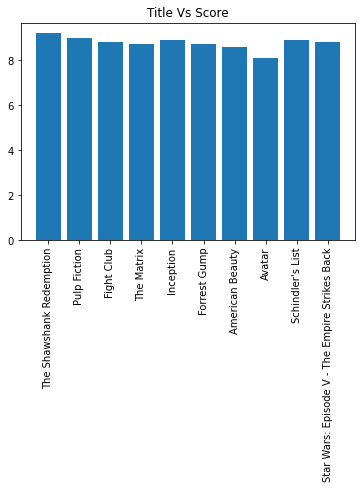

In [36]:

import matplotlib.pyplot as plt
%matplotlib inline
x = df.title.unique()[:10]
y = df.score[:10]
plt.bar(x,y)
plt.title("Title Vs Score")
plt.xticks(rotation=90)
plt.show()

Basicall shows the score of 10 movies 

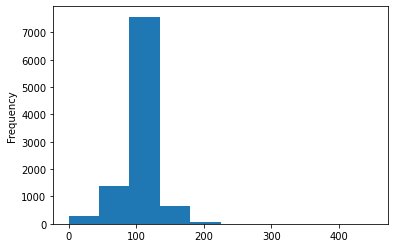

In [42]:
df['runtime'].plot(kind='hist', bins=10)

This histogram tells us that most of the movies have a duration of 100–125 minutes

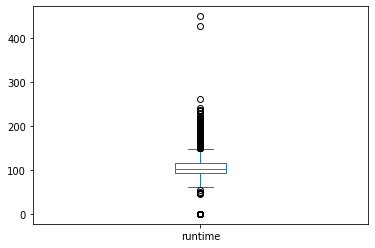

In [43]:
df['runtime'].plot(kind='box')

Box plot is telling us the same thing that most of the movies have a duration somewhere from 110 to 135 and we also have a clear median. Whereas, with histogram, we were unable to tell the median clearly.


## 5. Determining Best Movies

In [65]:
IMDb_Top_10=df[['score','votes','title','year']]

IMDb_sort= IMDb_Top_10.sort_values(by=['score'],ascending=False)
IMDb_Top_10.head(10)

score   votes                                           title  year
0    9.2  619479                        The Shawshank Redemption  1994
1    9.0  490065                                    Pulp Fiction  1994
2    8.8  458173                                      Fight Club  1999
3    8.7  448114                                      The Matrix  1999
4    8.9  385149                                       Inception  2010
5    8.7  368994                                    Forrest Gump  1994
6    8.6  338332                                 American Beauty  1999
7    8.1  336855                                          Avatar  2009
8    8.9  325888                                Schindler's List  1993
9    8.8  320105  Star Wars: Episode V - The Empire Strikes Back  1980

## 6. Trends in Popularity of Genres

In [37]:
genredf = df[list(genre_set)]
genredf.head()

War  Action  Mystery  Comedy  Biography  Horror  Adventure  Drama  Crime  \
0  False   False    False   False      False   False      False   True   True   
1  False   False    False   False      False   False      False  False   True   
2  False   False     True   False      False   False      False   True  False   
3  False    True    False   False      False   False       True  False  False   
4  False    True    False   False      False   False       True  False  False   

   Film-Noir  ...  Music  Fantasy  Animation  Sport  Reality-TV  Sci-Fi  \
0      False  ...  False    False      False  False       False   False   
1      False  ...  False    False      False  False       False   False   
2      False  ...  False    False      False  False       False   False   
3      False  ...  False    False      False  False       False    True   
4      False  ...  False    False      False  False       False    True   

    News  Thriller  Adult  History  
0  False     False  False    False  
1  False      True  False    False  
2  False      True  False    False  
3  False     False  False    False  
4  False      True  False    False  

[5 rows x 24 columns]

In [38]:
genre_result = genredf.sum()
genre_result.sort_values(ascending = False)

Drama         5697
Comedy        3922
Thriller      2832
Romance       2441
Action        1891
Crime         1867
Adventure     1313
Horror        1215
Mystery       1009
Fantasy        916
Sci-Fi         897
Family         754
War            512
Biography      394
Music          371
History        358
Animation      314
Sport          288
Musical        260
Western        235
Film-Noir       40
Adult            9
Reality-TV       1
News             1
dtype: int64

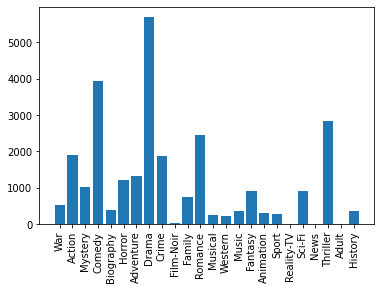

In [39]:
y = genre_result
x = list(genre_set)
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()